# Target & Feature Scrape Functions

In [5966]:
import numpy as np
from bs4 import BeautifulSoup
import requests
from sklearn.linear_model import RidgeCV
import scipy.stats as stats
import statsmodels.api as sm
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import random
import os
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
import seaborn as sns
plt.style.use('seaborn')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [68]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/marcmuon/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/marcmuon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### Get Campaign Full Overview Text and Length

In [70]:
def campaign_text():

    # Grab description of campaign in text
    words = soup.find(class_='full-description').text
    words = words.replace('\xa0', '').split('\n')

    # Count number of words in campaign description
    count = 0
    for word in words:
        sentence = word.split(' ')
        count += len(sentence)
    return count

### Get Campaign Summary and Length

In [71]:
def campaign_text_len():

    # Grab campaign title text
    desc = soup.find(class_='type-18-md').text
    desc_words = desc.split(' ')
    return len(desc_words)
    # title = soup.title.text
    # title_txt = title.split('by')[0].strip()
    # print(len(title_txt))

### Get Suggested Pledge Amount

In [72]:
def pledge_amount():

    pledge = soup.input
    pledge = str(soup.find(class_='pledge__no-reward__input'))
    pledge_int = int(pledge.split('value="')[1][0:2])
    return pledge_int

### Get Number of Images in Description

In [73]:
def image_count():

    images = soup.find_all(class_='fit')
    return len(images)

### Video Header or Not

In [74]:
def video_header():
    header = soup.find_all(class_='ksr-video-player')
    if header:
        return 1
    else:
        return 0

### Get Pledged and Goal

In [75]:
def pledged_amount():
    pledged = soup.find(class_='ksr-green-700').text
    return pledged


def goal_amount():
    goal = soup.find(class_='money').text
    return goal

### Get Number of Pledge Gift Options

In [76]:
def gift_options():

    gifts = soup.find_all(class_='pledge__hover-content')
    gift_num = len(gifts)
    return gift_num

### Get Average Pledge Options

In [77]:
def average_pledge_amount():

    convert = soup.find_all(class_='pledge__currency-conversion')
    count = 0
    total = 0
    for options in convert:
        options = options.text
        amount = options.split('$')[1].strip()
        amount = amount.replace(',', '')
        amount = amount.split('.')[0]
        total += int(amount)
        count += 1
    average_option = total / count
    return average_option

### Sentiment Analysis

In [78]:
def description_sentiment():

    # get sentiment of the description
    sid = SentimentIntensityAnalyzer()
    words = soup.find(class_='full-description').text
    words = words.replace('\xa0', '').split('\n')
    chunk = ''
    for word in words:
        if word:
            chunk = chunk + ' ' + word
    scores = sid.polarity_scores(chunk)
    return scores

def sentiment_parse_pos(scores_dict):
    return scores_dict['pos']

def sentiment_parse_neg(scores_dict):
    return scores_dict['neg']

def sentiment_parse_neu(scores_dict):
    return scores_dict['neu']

def sentiment_parse_compound(scores_dict):
    return scores_dict['compound']

In [79]:
def summary_sentiment():
    desc = soup.find(class_='type-18-md').text
    # get sentiment of the summary text
    sid2 = SentimentIntensityAnalyzer()
    scores_desc = sid2.polarity_scores(desc)
    return scores_desc

### Get Project Length

In [80]:
def update_page(url):

    update_page = '/updates'
    url = url.split('?')[0]
    updates = url + update_page
    response = requests.get(updates)
    page = response.text
    soup = BeautifulSoup(page, "lxml")
    return soup

In [81]:
import datetime
from dateutil import parser

def project_length(url):
    soup = update_page(url)
    start = soup.find_all('time')
    first = start[-1].text
    now = datetime.datetime.now()
    dt = parser.parse(first)
    diff = now - dt
    day_length = diff.days
    return day_length

# Pipeline to Scrape All Pages

### Collect List of Pages to Scrape

In [4694]:
chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver


driver = webdriver.Chrome(chromedriver)
page = '1'
url = 'https://www.kickstarter.com/discover/advanced?woe_id=23424977&sort=end_date&seed=2579760&page=' + page
driver.get(url)

In [4695]:
link_list = []
for p in range(8, 13):
    page = str(p)
    
    url = 'https://www.kickstarter.com/discover/advanced?woe_id=23424977&sort=end_date&seed=2579603&page=' + page
    time.sleep(.1+.6*random.random())
    driver.get(url)
    elems = driver.find_elements_by_xpath("//a[@href and @class='block img-placeholder w100p']")
    for elem in elems:
        link_list.append(elem.get_attribute("href"))
link_list

['https://www.kickstarter.com/projects/1819480674/makeup-and-cosmetics-self-love-brand?ref=discovery',
 'https://www.kickstarter.com/projects/amberdunnministries/amber-dunn-worship-ep-heaven-reaching-down?ref=discovery',
 'https://www.kickstarter.com/projects/206230260/derelict-ink-vol-2?ref=discovery',
 'https://www.kickstarter.com/projects/threecupsdesign/make-100-sigils?ref=discovery',
 'https://www.kickstarter.com/projects/1357652086/berashield-total-protection-system-for-smartphone?ref=discovery',
 'https://www.kickstarter.com/projects/nickjcrabb/camber-brewing-company-help-us-make-the-best-beer?ref=discovery',
 'https://www.kickstarter.com/projects/privateerpress/the-art-of-privateer-press?ref=discovery',
 'https://www.kickstarter.com/projects/1789463192/extra-virgin-olive-oil-from-catalonia-spain?ref=discovery',
 'https://www.kickstarter.com/projects/njpartistry/a-childs-artistry?ref=discovery',
 'https://www.kickstarter.com/projects/outofmycomfortzone/out-of-my-comfort-zone-fea

### Save Link List

In [4696]:
import pickle

with open('links_3day_3lt.pkl', 'wb') as f:
    pickle.dump(link_list, f)

In [760]:
link_list = link_list[1:]

### Scrape all Pages in Pipeline

In [4697]:
df_dict = dict()
row_list = []
for idx, link in enumerate(link_list):
    row_list = []
    url = link
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page, "lxml")
    
    #row_list.append(target())
    row_list.append(pledged_amount())
    row_list.append(goal_amount())
    row_list.append(campaign_text())
    row_list.append(campaign_text_len())
    row_list.append(pledge_amount())
    row_list.append(image_count())
    row_list.append(video_header())
    row_list.append(gift_options())
    row_list.append(average_pledge_amount())
    
    overview_scores = description_sentiment()
    row_list.append(sentiment_parse_pos(overview_scores))
    row_list.append(sentiment_parse_neg(overview_scores))
    row_list.append(sentiment_parse_neu(overview_scores))
    row_list.append(sentiment_parse_compound(overview_scores))
    
    summary_scores = summary_sentiment()
    row_list.append(sentiment_parse_pos(summary_scores))
    row_list.append(sentiment_parse_neg(summary_scores))
    row_list.append(sentiment_parse_neu(summary_scores))
    row_list.append(sentiment_parse_compound(summary_scores))
    
    row_list.append(project_length(url))
    df_dict[idx]= row_list
    print(idx)
    time.sleep(.1+.6*random.random())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


### Save Scraped Dict

In [4698]:
import pickle
with open('dict_3day_3lt.pkl', 'wb') as f:
    pickle.dump(df_dict, f)

### Load Scraped Dict

In [6207]:
with open('dict_3day.pkl', 'rb') as f:
     df_dict = pickle.load(f)

In [6208]:
with open('dict_3day_2.pkl', 'rb') as f:
     df_dict_2 = pickle.load(f)

In [6209]:
with open('dict_3day_3lt.pkl', 'rb') as f:
     df_dict_3 = pickle.load(f)

# Pandas Cleaning

In [6210]:
import pandas as pd
df3 = pd.DataFrame.from_dict(df_dict_3,orient='index')
df2 = pd.DataFrame.from_dict(df_dict_2,orient='index')
df = pd.DataFrame.from_dict(df_dict,orient='index')

In [6211]:
def clean_df(df):
    df[df.columns[0:2]] = df[df.columns[0:2]].apply(
        lambda x: x.str.replace('$', '')).apply(
            lambda x: x.str.replace(',', ''))
    df = df[~df[1].str.contains('\.')]
    df = df[~df[1].str.contains('CA')]
    df = df[~df[1].str.contains('€')]
    df = df[~df[1].str.contains('£')]
    df = df[~df[1].str.contains(' ')]
    df['y'] = df[0].astype(int) / df[1].astype(int)

    df = df.rename(
        index=str,
        columns={
            0: "pledged",
            1: "goal",
            2: "all_text",
            3: "summary_text",
            4: "suggest_pledge",
            5: "photo_cnt",
            6: "video_header",
            7: "num_gift_options",
            8: "avg_pledge_options",
            9: "all_sentiment_pos",
            10: "all_sentiment_neg",
            11: "all_sentiment_neu",
            12: "all_sentiment_comp",
            13: "summary_sentiment_pos",
            14: "summary_sentiment_neg",
            15: "summary_sentiment_neu",
            16: "summary_sentiment_comp",
            17: "project_length"
        })

    df[[
        'pledged', 'goal', 'all_text', 'summary_text', 'avg_pledge_options',
        'suggest_pledge', 'photo_cnt', 'num_gift_options', 'video_header',
        'all_sentiment_pos', 'all_sentiment_neg', 'project_length',
        'all_sentiment_neu', 'all_sentiment_comp', 'summary_sentiment_pos',
        'summary_sentiment_neg', 'summary_sentiment_neu',
        'summary_sentiment_comp'
    ]] = df[[
        'pledged', 'goal', 'all_text', 'summary_text', 'avg_pledge_options',
        'suggest_pledge', 'photo_cnt', 'num_gift_options', 'video_header',
        'all_sentiment_pos', 'all_sentiment_neg', 'project_length',
        'all_sentiment_neu', 'all_sentiment_comp', 'summary_sentiment_pos',
        'summary_sentiment_neg', 'summary_sentiment_neu',
        'summary_sentiment_comp'
    ]].astype(float)
    
    return df

In [6212]:
df = clean_df(df)
df2 = clean_df(df2)
df3 = clean_df(df3)

In [6213]:
df = pd.concat([df,df2,df3])

# EDA

In [6179]:
df.describe()

,pledged,goal,all_text,summary_text,suggest_pledge,photo_cnt,video_header,num_gift_options,avg_pledge_options,all_sentiment_pos,all_sentiment_neg,all_sentiment_neu,all_sentiment_comp,summary_sentiment_pos,summary_sentiment_neg,summary_sentiment_neu,summary_sentiment_comp,project_length,y
count,320.000000,320.000000,320.000000,320.000000,320.0,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,9254.718750,21684.837500,580.159375,15.190625,10.0,9.000000,0.553125,7.459375,360.438144,0.140803,0.034366,0.818556,0.824831,0.153441,0.037803,0.808741,0.237769,34.353125,10.734186
std,42969.401172,72843.636913,617.621489,6.468000,0.0,14.544926,0.497948,6.020204,806.697537,0.062874,0.034490,0.091246,0.422794,0.163678,0.083762,0.177451,0.387968,16.218637,160.957322
min,1.000000,1.000000,10.000000,1.000000,10.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.998700,0.000000,0.000000,0.069000,-0.831600,1.000000,0.000001
25%,51.000000,1000.000000,203.000000,9.000000,10.0,0.000000,0.000000,4.000000,35.000000,0.099000,0.009750,0.782250,0.930500,0.000000,0.000000,0.689250,0.000000,23.000000,0.006000
50%,678.000000,5000.000000,397.000000,16.000000,10.0,4.000000,1.000000,6.500000,94.875000,0.137000,0.023000,0.827500,0.987450,0.123500,0.000000,0.821500,0.225350,29.000000,0.378825
75%,4163.500000,10472.000000,773.000000,20.000000,10.0,11.000000,1.000000,9.250000,276.654762,0.180000,0.046000,0.861250,0.997425,0.269750,0.000000,1.000000,0.571900,49.000000,1.260717
max,636914.000000,750000.000000,5049.000000,28.000000,10.0,99.000000,1.000000,40.000000,10000.000000,0.394000,0.184000,1.000000,1.000000,0.785000,0.487000,1.000000,0.930000,60.000000,2880.000000


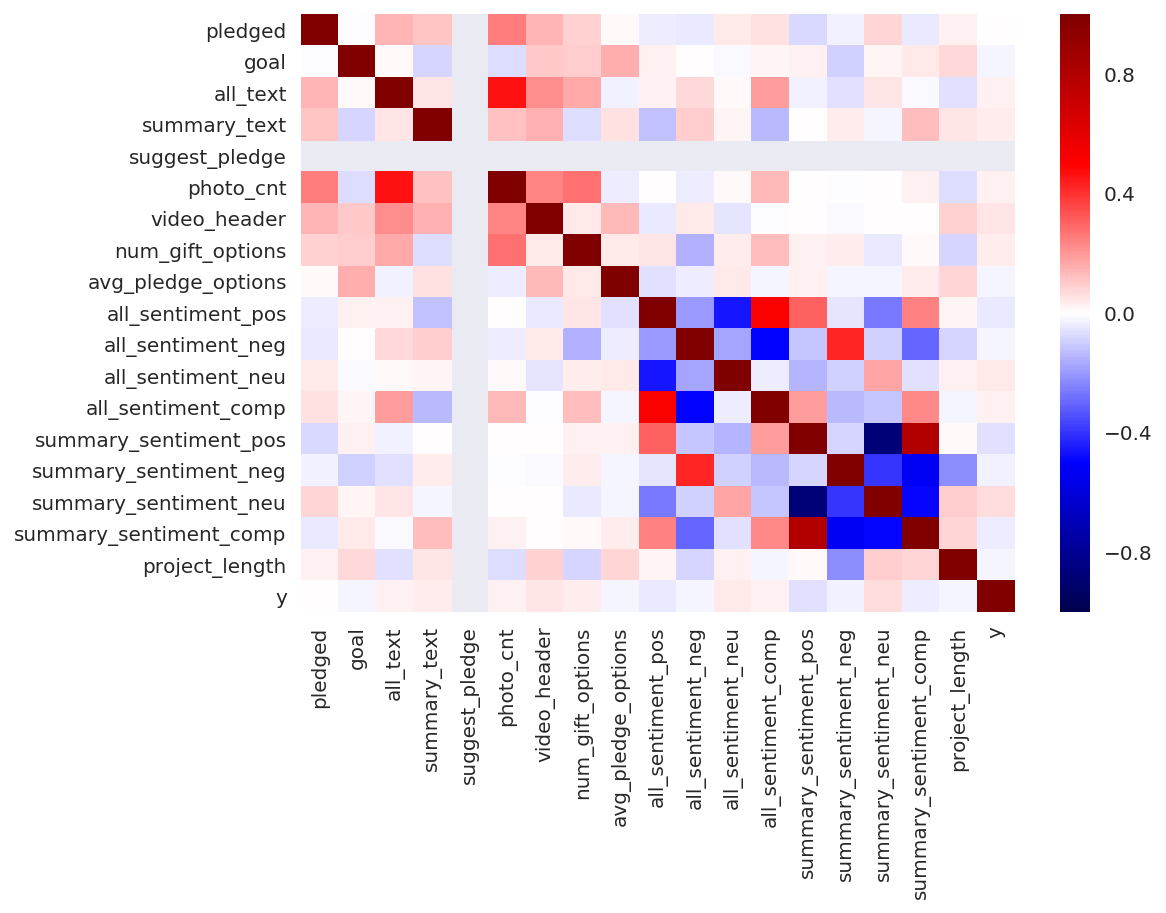

In [6180]:
sns.heatmap(df.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

### Outlier Removal - 20X IQR

In [6214]:
df = df.loc[df['pledged'] > 1]
df = df.loc[df['goal'] > 1]
df = df.loc[df['all_text'] < 5000]  # Removes the highest extreme Cook's distance x-point

In [6215]:
def remove_outlier(df, col, mult=3):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1
    lower_bound  = q1 - (mult  * iqr)
    upper_bound = q3 + (mult * iqr)

    out_df = df.loc[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return out_df

In [6216]:
df = remove_outlier(df,'pledged',mult=20)
df = remove_outlier(df,'goal',mult=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x1eae0113c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1eae011ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eae011240>],
 'medians': [<matplotlib.lines.Line2D at 0x1eae01b208>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eae01b588>],
 'means': []}

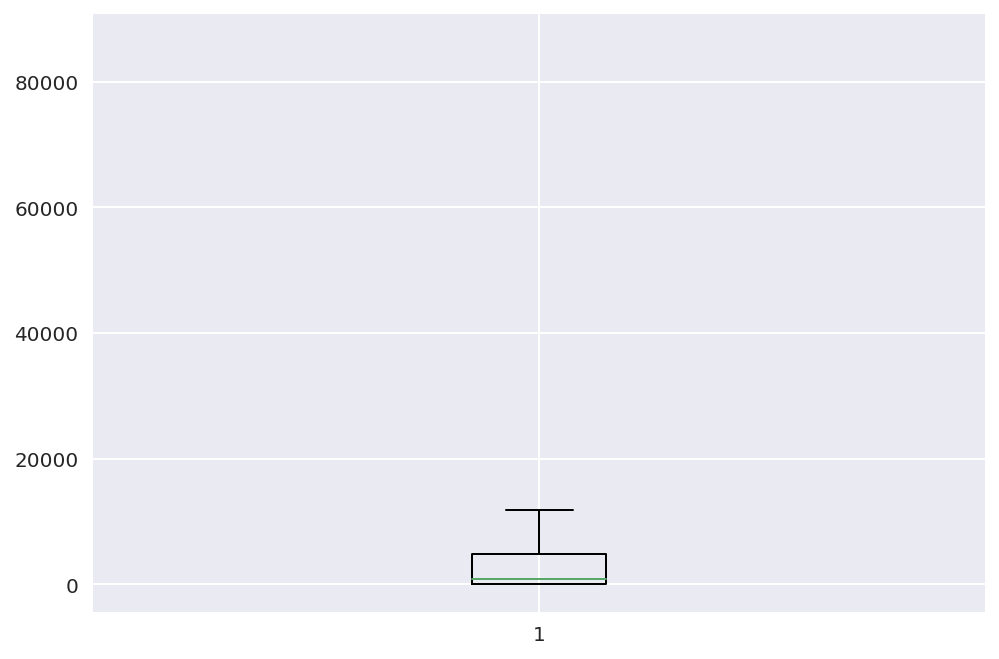

In [6184]:
plt.boxplot(df['pledged'])

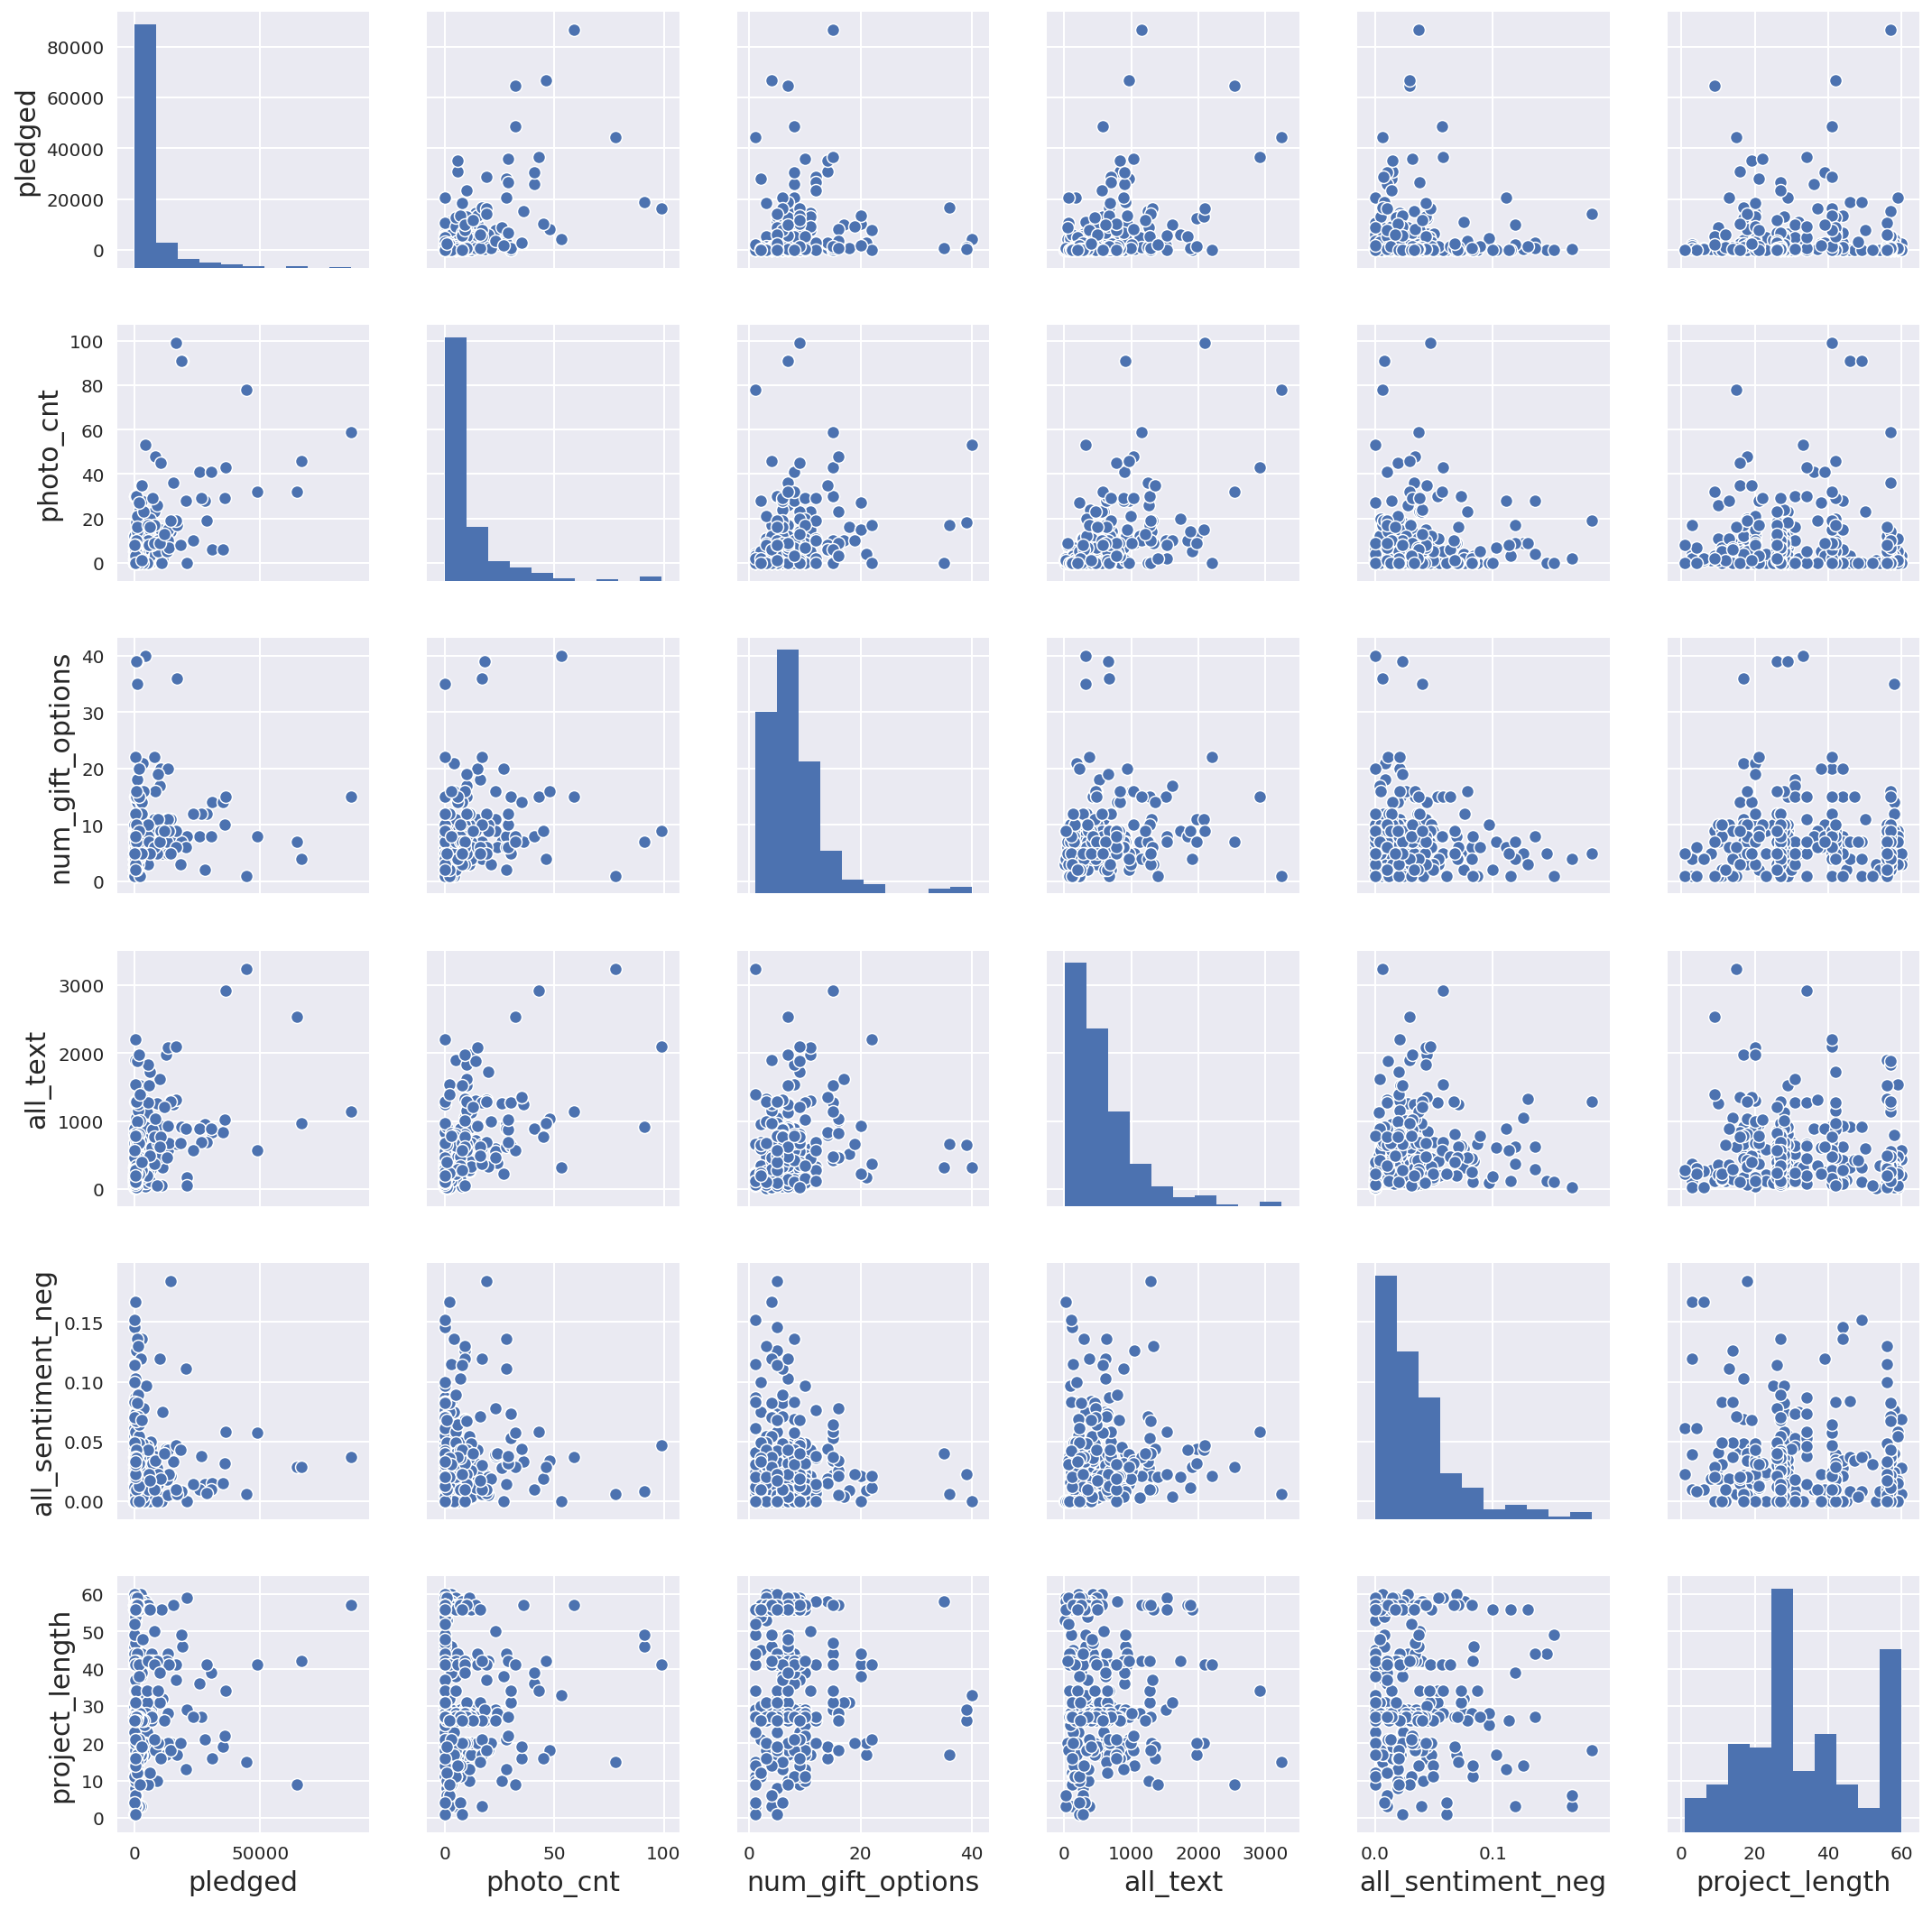

In [6185]:
sns.pairplot(df[['pledged','photo_cnt','num_gift_options','all_text','all_sentiment_neg','project_length']])

### Dependent y (pledged) Boxcox Transformation

(array([10., 14., 15., 29., 34., 44., 47., 38., 28., 10.]),
 array([ 0.69314718,  1.76063052,  2.82811387,  3.89559721,  4.96308055,
         6.0305639 ,  7.09804724,  8.16553058,  9.23301393, 10.30049727,
        11.36798061]),
 <a list of 10 Patch objects>)

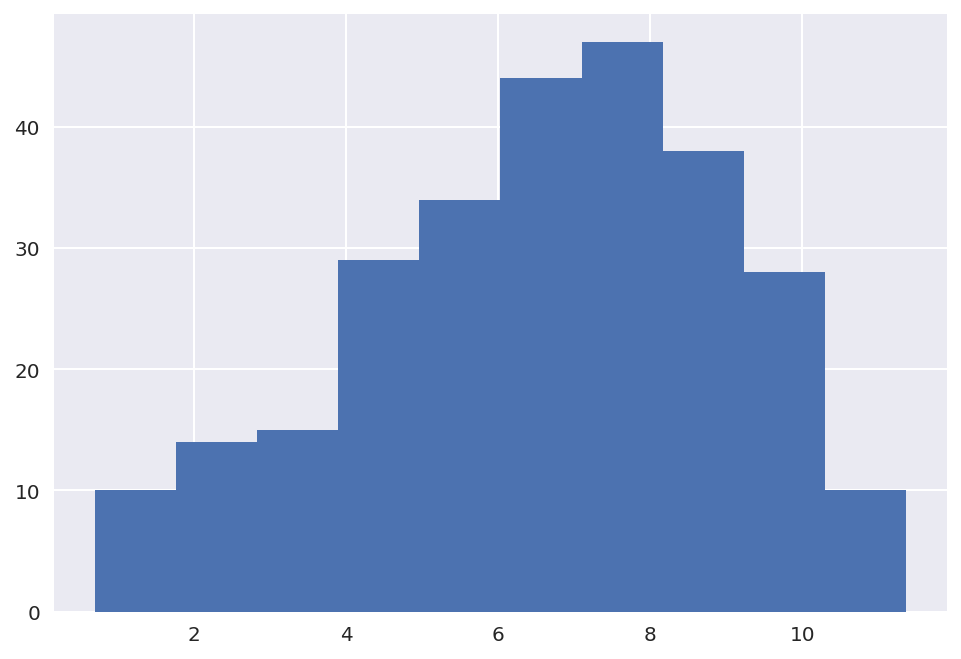

In [6217]:
df['y_log'] = np.log(df['pledged'])
plt.hist(df['y_log'])

### Boxcox Transformations of Features

Lambda: 0.23320947696282754


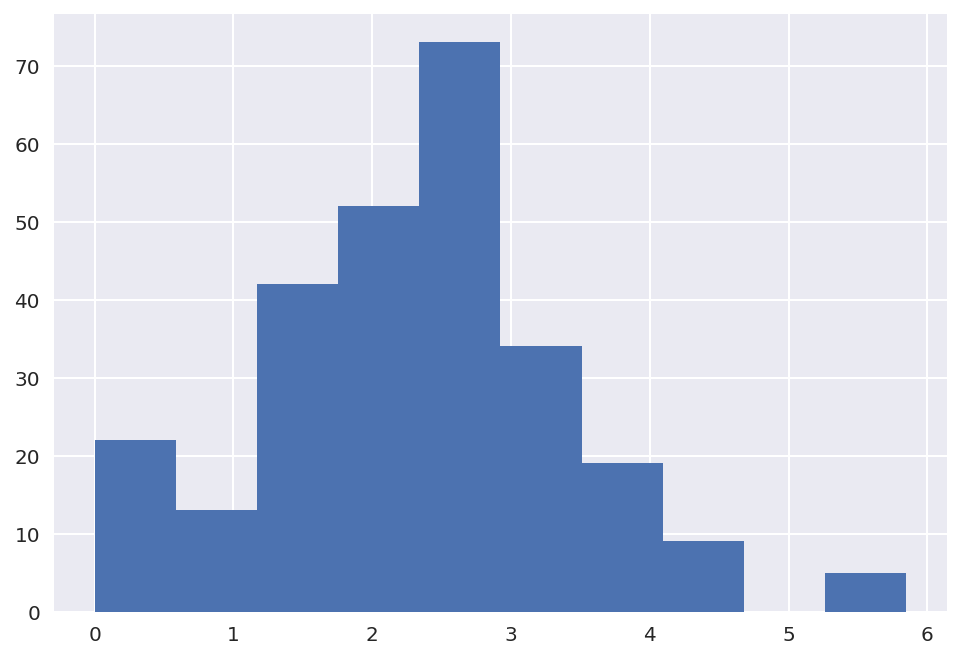

In [6218]:
lamb=stats.boxcox_normmax(df.num_gift_options, brack=(-1.9, 1.9))
print("Lambda:", lamb)
num_gift_options_t =(np.power(df.num_gift_options,lamb)-1)/lamb
plt.hist(num_gift_options_t)
df['num_gift_options_t'] = (np.power(df.num_gift_options,lamb)-1)/lamb

### Yeo-Johnson Transformation of Features
Used for when there 0 or negative values in the observations. In these cases, there are 0 values, so you cann Boxcox transform.

In [6219]:
pt = PowerTransformer()
pt.fit(df['all_sentiment_neg'].values.reshape(-1,1))
df['all_sentiment_neg_t'] = pt.transform(df['all_sentiment_neg'].values.reshape(-1,1))

In [6220]:
pt = PowerTransformer()
pt.fit(df['photo_cnt'].values.reshape(-1,1))
df['photo_cnt_t'] = pt.transform(df['photo_cnt'].values.reshape(-1,1))

{'whiskers': [<matplotlib.lines.Line2D at 0x1eb1475da0>,
 'caps': [<matplotlib.lines.Line2D at 0x1eb14784e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eb1475c18>],
 'medians': [<matplotlib.lines.Line2D at 0x1eb1478be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eb1478f60>],
 'means': []}

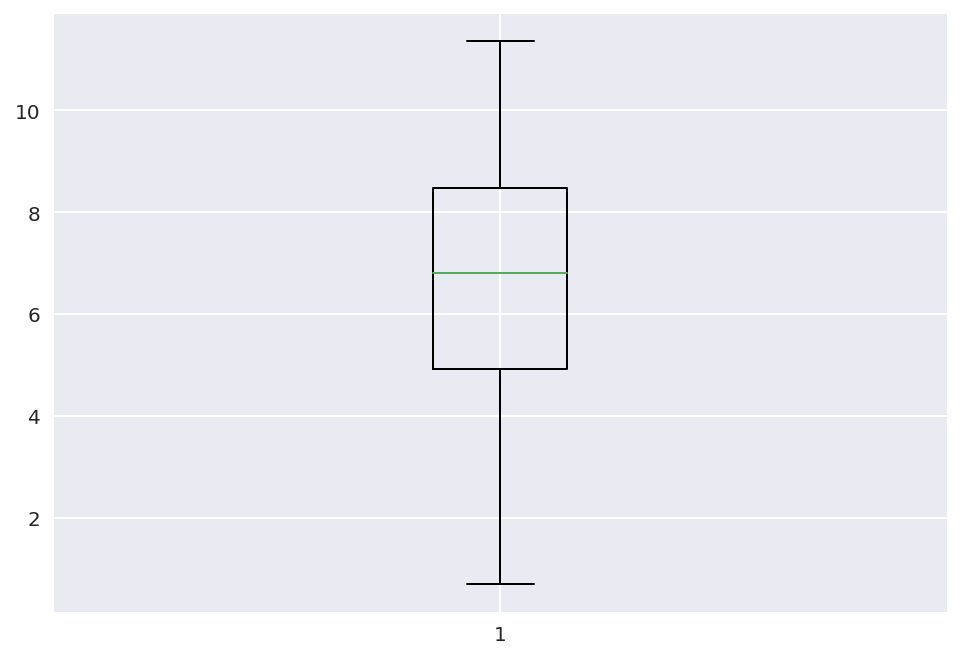

In [6190]:
plt.boxplot(df['y_log'])

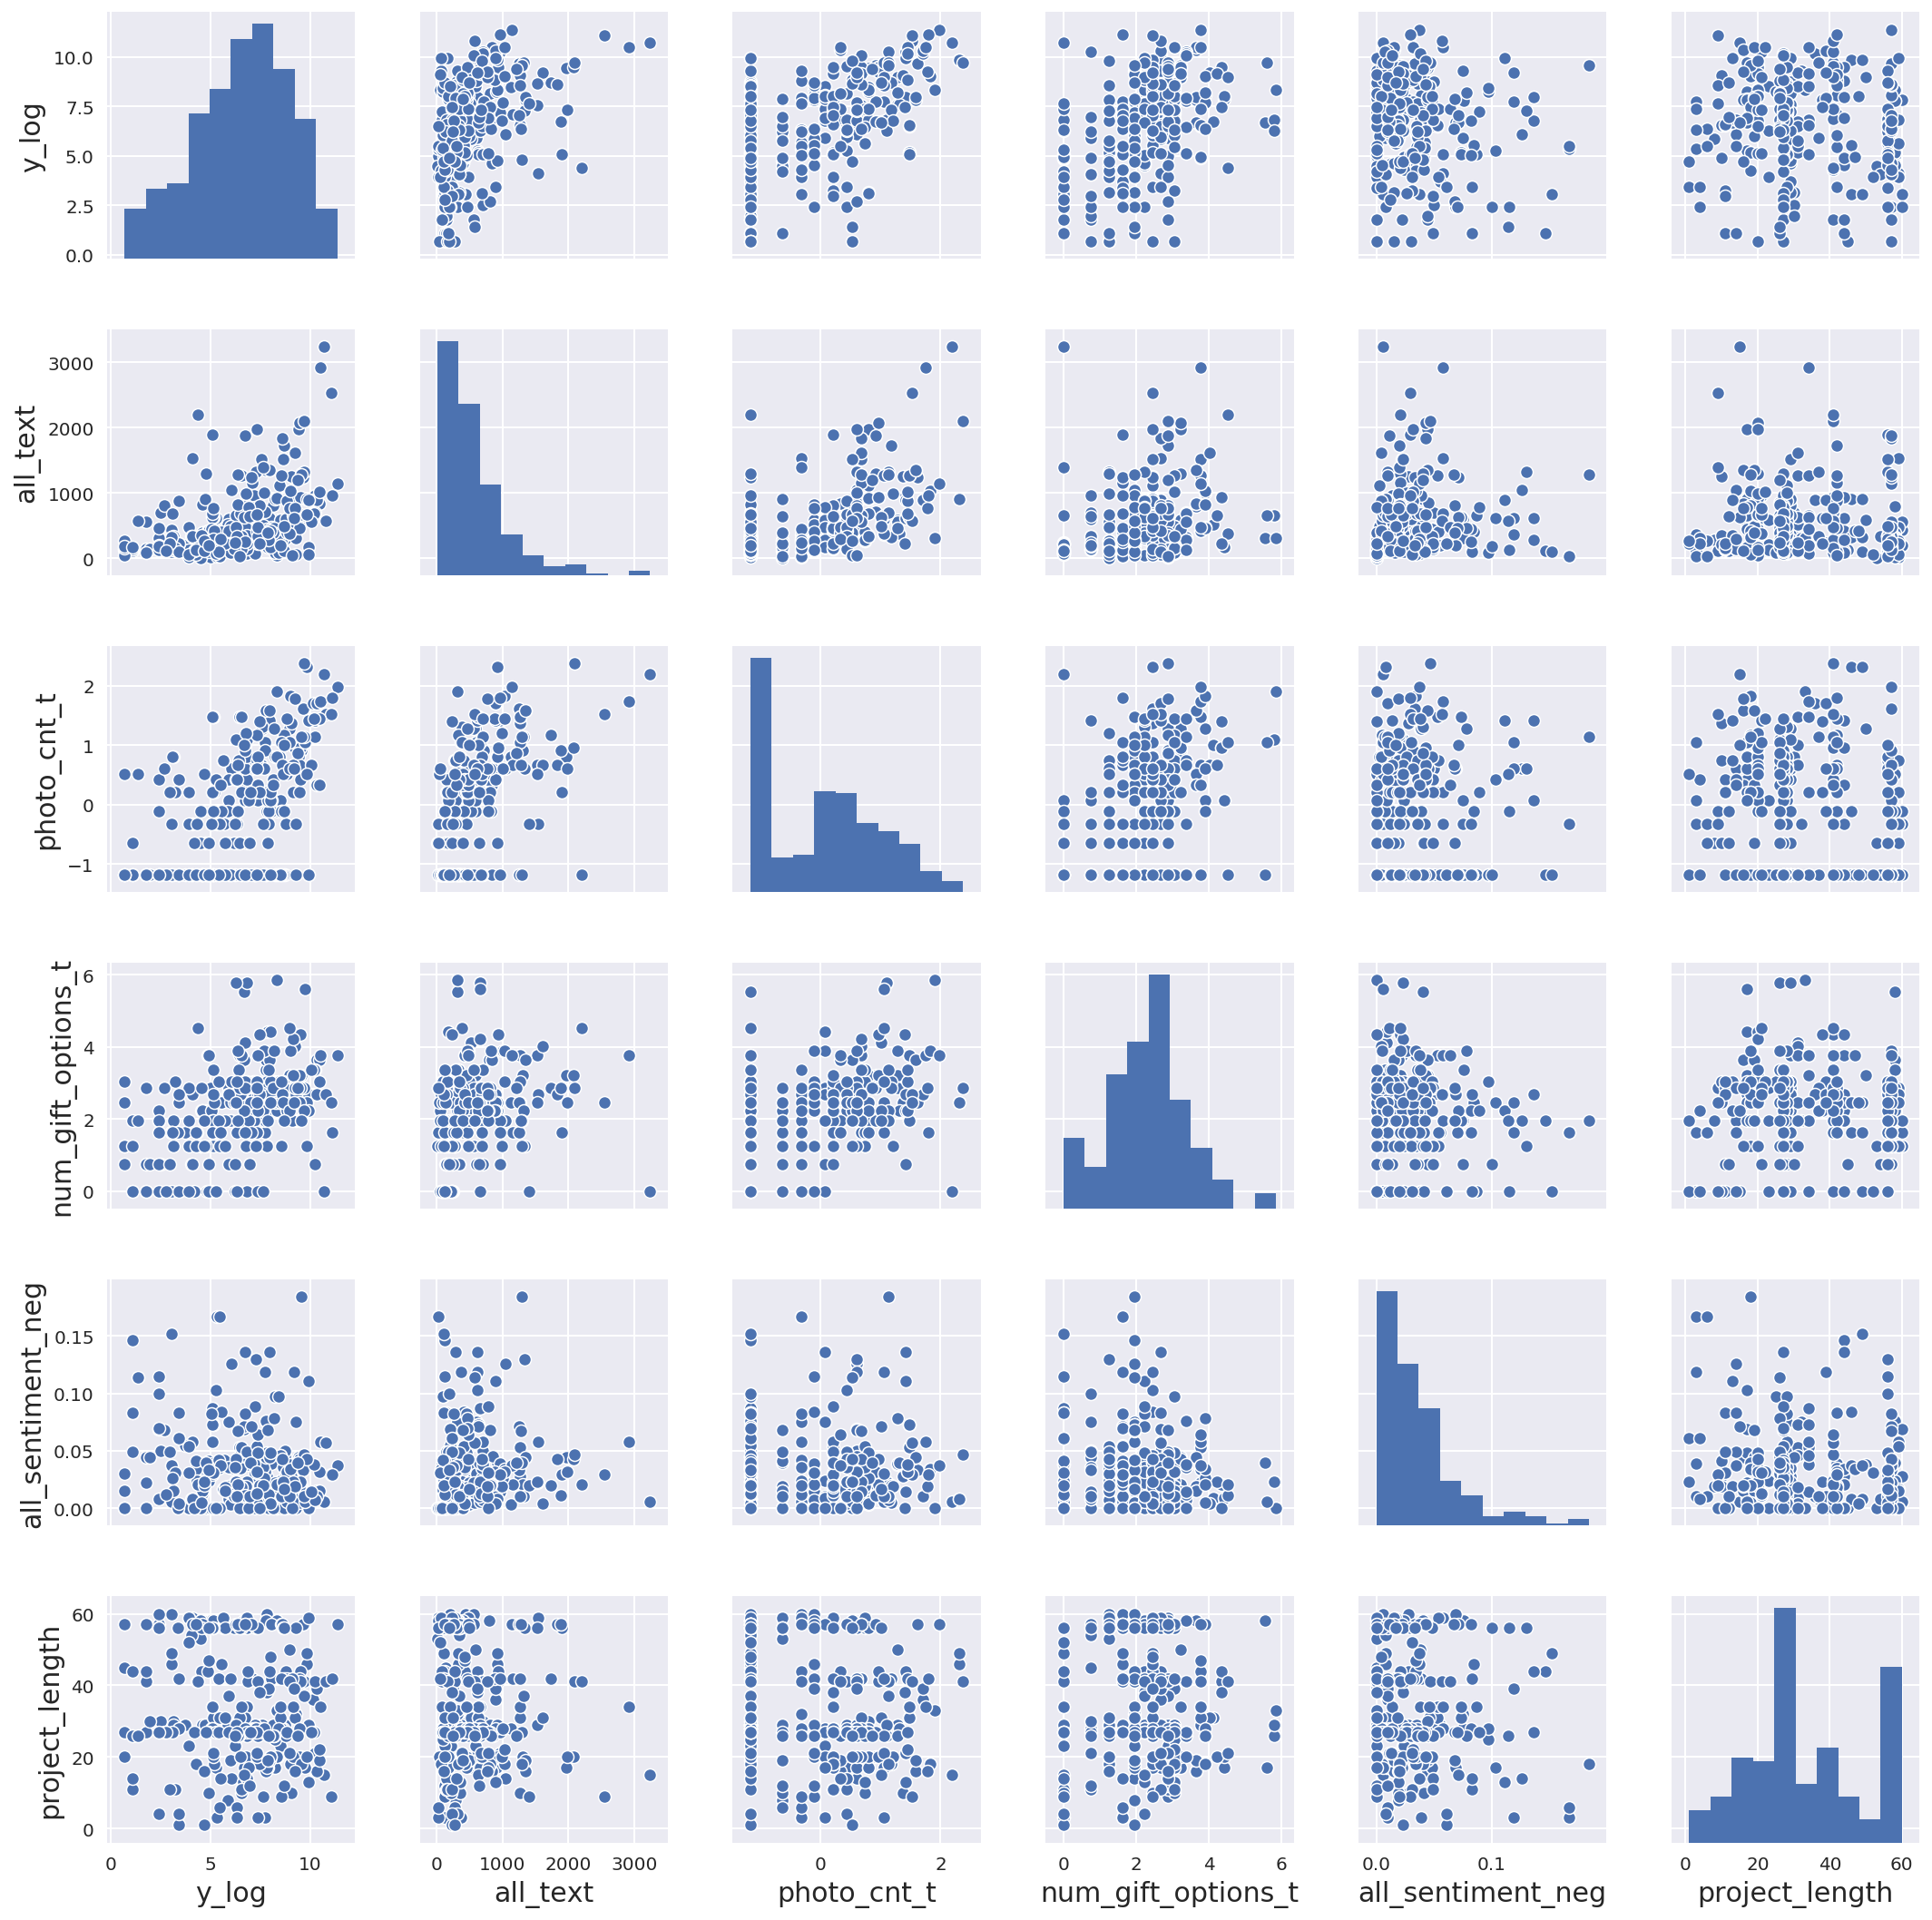

In [6191]:
sns.pairplot(df[['y_log','all_text','photo_cnt_t','num_gift_options_t','all_sentiment_neg','project_length']])

# Train & Validate

### Basic OLS

In [6221]:
import patsy
y, X = patsy.dmatrices(
    'y_log ~   all_text + project_length + photo_cnt_t + all_sentiment_neg + num_gift_options_t',
    data=df,
    return_type="dataframe")

In [6222]:
model = sm.OLS(y, X)

fit = model.fit()

print('RMSE:', np.sqrt(mean_squared_error(y,fit.predict(X))))

fit.summary()

RMSE: 1.881119924930568


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     36.42
Date:                Wed, 23 Jan 2019   Prob (F-statistic):           2.74e-28
Time:                        23:05:28   Log-Likelihood:                -551.67
No. Observations:                 269   AIC:                             1115.
Df Residuals:                     263   BIC:                             1137.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.3439      0.418     12.772      0.000       4.520       6.168
all_text               0.0008      0.000      2.961      0.003       0.000       0.001
project_length        -0.0066      0.008     -0.871      0.385      -0.021       0.008
photo_cnt_t            0.8920      0.149      5.992      0.000       0.599       1.185
all_sentiment_neg     -8.0056      3.467     -2.309      0.022     -14.832      -1.179
num_gift_options_t     0.5427      0.110      4.921      0.000       0.326       0.760
==============================================================================
Omnibus:                        7.285   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.131
Skew:                          -0.390   Prob(JB):                       0.0283
Kurtosis:                       3.166   Cond. No.                     2.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Training and Validation DataFrame Setup

In [6223]:
X, y = df.drop(['y_log','pledged'],axis=1), df['y_log']

In [6224]:
X = X.loc[:,['all_text','project_length','photo_cnt_t','all_sentiment_neg', 'num_gift_options_t']]

In [6225]:
X_orig = X.copy()
y_orig = y.copy()

In [6248]:
X = X_orig
y = y_orig

In [6249]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=77)

In [6250]:
X, y = np.array(X), np.array(y)

In [6251]:
def adjusted_r_squared(r_squared, X, y):
    return 1 - (1 - r_squared) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

### Run 3-Fold Ridge CV with 100 Random Splits

In [6252]:
from sklearn.model_selection import KFold
split_means_r2_lm, split_means_r2_lmreg, split_means_r2_hub = [], [], []
split_means_mae_lm, split_means_mae_lm_reg, split_means_mae_hub = [], [], []


for i in range(1, 1001):

    kf = KFold(n_splits=3, shuffle=True, random_state=i)
    cv_lm_r2s, cv_lm_reg_r2s, cv_lm_mae, cv_lm_reg_mae, cv_hub_r2s, cv_hub_mae = [
    ], [], [], [], [], []

    for train_ind, val_ind in kf.split(X, y):

        X_train, y_train = X[train_ind], y[train_ind]
        X_val, y_val = X[val_ind], y[val_ind]

        # Define Linear Regression, Ridge and Huber Models
        lm = LinearRegression()
        lm_reg = Ridge(alpha=28.66)
        huber = HuberRegressor(epsilon=1.35, alpha=14.9926843)

        # Linear Regression Score
        lm.fit(X_train, y_train)
        cv_lm_r2s.append(adjusted_r_squared(
            lm.score(X_val, y_val), X_val, y_val))
        cv_lm_mae.append(
            np.sqrt(mae(y_val, lm.predict(X_val))))

        # Scale Features for Ridge and Lasso use
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        # Ridge Score
        lm_reg.fit(X_train_scaled, y_train)
        cv_lm_reg_r2s.append(adjusted_r_squared(
            lm_reg.score(X_val_scaled, y_val), X_val_scaled, y_val))
        cv_lm_reg_mae.append(
            np.sqrt(mae(y_val, lm_reg.predict(X_val_scaled))))

        # Huber
        huber.fit(X_train_scaled, y_train)
        cv_hub_r2s.append(adjusted_r_squared(
            huber.score(X_val_scaled, y_val), X_val_scaled, y_val))
        cv_hub_mae.append(
            np.sqrt(mae(y_val, huber.predict(X_val_scaled))))

    split_means_r2_lm.append(np.mean(cv_lm_r2s))
    split_means_r2_lmreg.append(np.mean(cv_lm_reg_r2s))
    split_means_r2_hub.append(np.mean(cv_hub_r2s))
    split_means_mae_lm.append(np.mean(cv_lm_mae))
    split_means_mae_lm_reg.append(np.mean(cv_lm_reg_mae))
    split_means_mae_hub.append(np.mean(cv_hub_mae))

In [6253]:
print(f'1000 Random Splits - Simple mean cv adj. r^2: {np.mean(split_means_r2_lm):.3f} +- {np.std(split_means_r2_lm):.3f}')
print(f'1000 Random Splits - All Ridge mean cv adj. r^2: {np.mean(split_means_r2_lmreg):.3f} +- {np.std(split_means_r2_lmreg):.3f}')
print(f'1000 Random Splits - All Huber mean cv adj. r^2: {np.mean(split_means_r2_hub):.3f} +- {np.std(split_means_r2_hub):.3f}')

print(f'1000 Random Splits - All Simple mean MAE cv: {np.mean(split_means_mae_lm):.3f} +- {np.std(split_means_mae_lm):.3f}')
print(f'1000 Random Splits - All Ridge mean MAE cv: {np.mean(split_means_mae_lm_reg):.3f} +- {np.std(split_means_mae_lm_reg):.3f}')
print(f'1000 Random Splits - All Huber mean MAE cv: {np.mean(split_means_mae_hub):.3f} +- {np.std(split_means_mae_hub):.3f}')


1000 Random Splits - Simple mean cv adj. r^2: 0.272 +- 0.026
1000 Random Splits - All Ridge mean cv adj. r^2: 0.278 +- 0.023
1000 Random Splits - All Huber mean cv adj. r^2: 0.280 +- 0.022
1000 Random Splits - All Simple mean MAE cv: 1.229 +- 0.010
1000 Random Splits - All Ridge mean MAE cv: 1.230 +- 0.008
1000 Random Splits - All Huber mean MAE cv: 1.225 +- 0.009


### Find Best Alpha for Huber Regression

In [5915]:
# Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

In [6241]:
# For this section, re-generate original dataframes before running
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20,random_state=17)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [6243]:
alphalist = 10**(np.linspace(-2, 2, 200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i, curr_alpha in enumerate(alphalist):

    steps = [('standardize', StandardScaler()),
             ('huber', HuberRegressor(epsilon=1.35, alpha=curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(
        X_train.loc[:, [
            'all_text','project_length','photo_cnt_t','all_sentiment_neg', 'num_gift_options_t'
        ]].values, y_train)

    val_set_pred = pipe.predict(X_val.loc[:, [
        'all_text','project_length','photo_cnt_t','all_sentiment_neg', 'num_gift_options_t'
    ]].values)
    err_vec_val[i] = mae(y_val, val_set_pred)
alphalist[np.argmin(err_vec_val)]

14.992684327860456

### Find Best Lambda for Ridge CV

In [6246]:
# For this section, re-generate original dataframes before running
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20,random_state=17)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [6247]:
alphalist = 10**(np.linspace(-2, 2, 200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i, curr_alpha in enumerate(alphalist):

    steps = [('standardize', StandardScaler()),
             ('ridge', Ridge(alpha=curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(
        X_train.loc[:, [
            'all_text','project_length','photo_cnt_t','all_sentiment_neg', 'num_gift_options_t'
        ]].values, y_train)

    val_set_pred = pipe.predict(X_val.loc[:, [
        'all_text','project_length','photo_cnt_t','all_sentiment_neg', 'num_gift_options_t'
    ]].values)
    err_vec_val[i] = mae(y_val, val_set_pred)
alphalist[np.argmin(err_vec_val)]

28.660676169482503

# 80/20 Train Test Split
Using the split defined pre-validation above.

In [6231]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

huber = HuberRegressor(epsilon=1.35, alpha=14.9926843)
huber.fit(X_scaled, y)

print(adjusted_r_squared(huber.score(X_test_scaled, y_test), X_test_scaled, y_test))

test_set_pred = huber.predict(X_test_scaled)

print(mae(y_test, test_set_pred))

0.38868149396247953
1.6101265873227788


# Interpretation
a unit increase in x is associated with an increase of 100(e^β − 1) percent in y

In [6232]:
huber.coef_

array([ 0.42487367, -0.11582127,  0.84860936, -0.25996233,  0.47267935])

In [6233]:
# Every additional unit increase in Length leads to -10.9% increase in pledged
100*(np.exp(huber.coef_[1]) - 1)

-10.936560999728751

In [6234]:
# Every additional unit increase in Negative Sentiment Score leads to -22% change in pledged
100*(np.exp(huber.coef_[3]) - 1)

-22.89193705059185

# OLS Assumptions

### Diagnostic Plots taken from Robert's Blog

In [5762]:
def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')


def diagnostic_plots(X, y, model_fit=None):
    """
    Function to reproduce the 4 base plots of an OLS model from R.

    ---
    Inputs:

    X: A numpy array or pandas dataframe of the features to use in building the linear regression model

    y: A numpy array or pandas series/dataframe of the target variable of the linear regression model

    model_fit [optional]: a statsmodel.api.OLS model after regressing y on X. If not provided, will be
                          generated from X, y
    """

    if not model_fit:
        model_fit = sm.OLS(y, sm.add_constant(X)).fit()

    # create dataframe from X, y for easier plot handling
    dataframe = pd.concat([X, y], axis=1)

    # model values
    model_fitted_y = model_fit.fittedvalues
    # model residuals
    model_residuals = model_fit.resid
    # normalized residuals
    model_norm_residuals = model_fit.get_influence().resid_studentized_internal
    # absolute squared normalized residuals
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    # absolute residuals
    model_abs_resid = np.abs(model_residuals)
    # leverage, from statsmodels internals
    model_leverage = model_fit.get_influence().hat_matrix_diag
    # cook's distance, from statsmodels internals
    model_cooks = model_fit.get_influence().cooks_distance[0]

    # Residuals vs Fitted Plot
    plot_lm_1 = plt.figure()
    plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                                      lowess=True,
                                      scatter_kws={'alpha': 0.5},
                                      line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted values')
    plot_lm_1.axes[0].set_ylabel('Residuals')

    # Normal Q-Q Plot
    QQ = ProbPlot(model_norm_residuals)
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
    plot_lm_2.axes[0].set_ylabel('Standardized Residuals')
    # annotations
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]
    for r, i in enumerate(abs_norm_resid_top_3):
        plot_lm_2.axes[0].annotate(i,
                                   xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                       model_norm_residuals[i]))

    # Scale vs Location Plot
    plot_lm_3 = plt.figure()
    plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
    sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plot_lm_3.axes[0].set_title('Scale-Location')
    plot_lm_3.axes[0].set_xlabel('Fitted values')
    plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

    # annotations
    abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
    for i in abs_norm_resid_top_3:
        plot_lm_3.axes[0].annotate(i,
                                   xy=(model_fitted_y[i],
                                       model_norm_residuals_abs_sqrt[i]))

    # Residuals vs Leverage Plot
    plot_lm_4 = plt.figure()
    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
    sns.regplot(model_leverage, model_norm_residuals,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
    plot_lm_4.axes[0].set_ylim(-3, 5)
    plot_lm_4.axes[0].set_title('Residuals vs Leverage')
    plot_lm_4.axes[0].set_xlabel('Leverage')
    plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

    # annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
    for i in leverage_top_3:
        plot_lm_4.axes[0].annotate(i,
                                   xy=(model_leverage[i],
                                       model_norm_residuals[i]))

    p = len(model_fit.params)  # number of model parameters
    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
          np.linspace(0.001, max(model_leverage), 50),
          'Cook\'s distance')  # 0.5 line
    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
          np.linspace(0.001, max(model_leverage), 50))  # 1 line
    plot_lm_4.legend(loc='upper right')

### Plots for non-transformed Variables
i.e. in this run, there is no transformation on the dependent 'pledged', and no transformation on 'photo count', 'negative description sentiment', and 'number of gift options'.

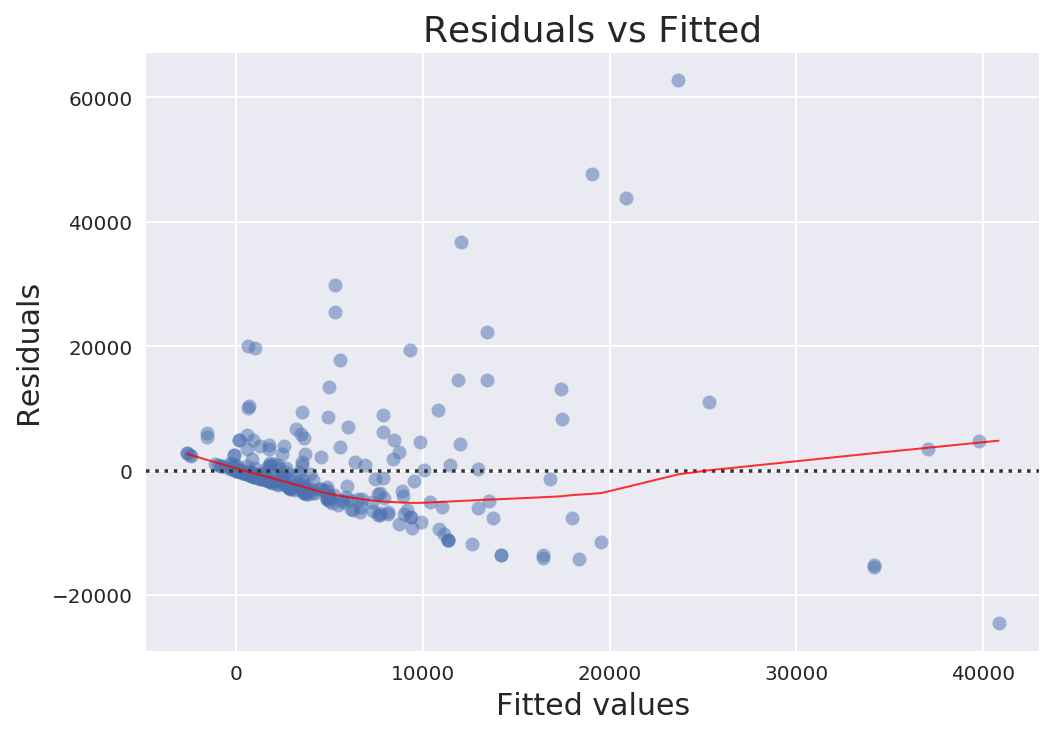

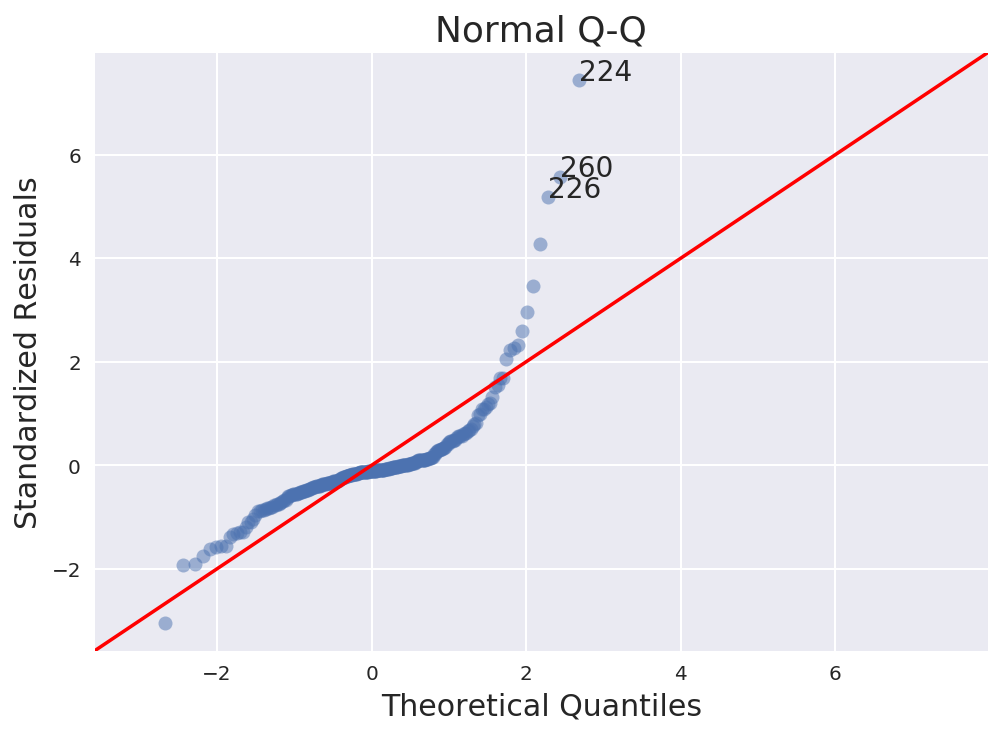

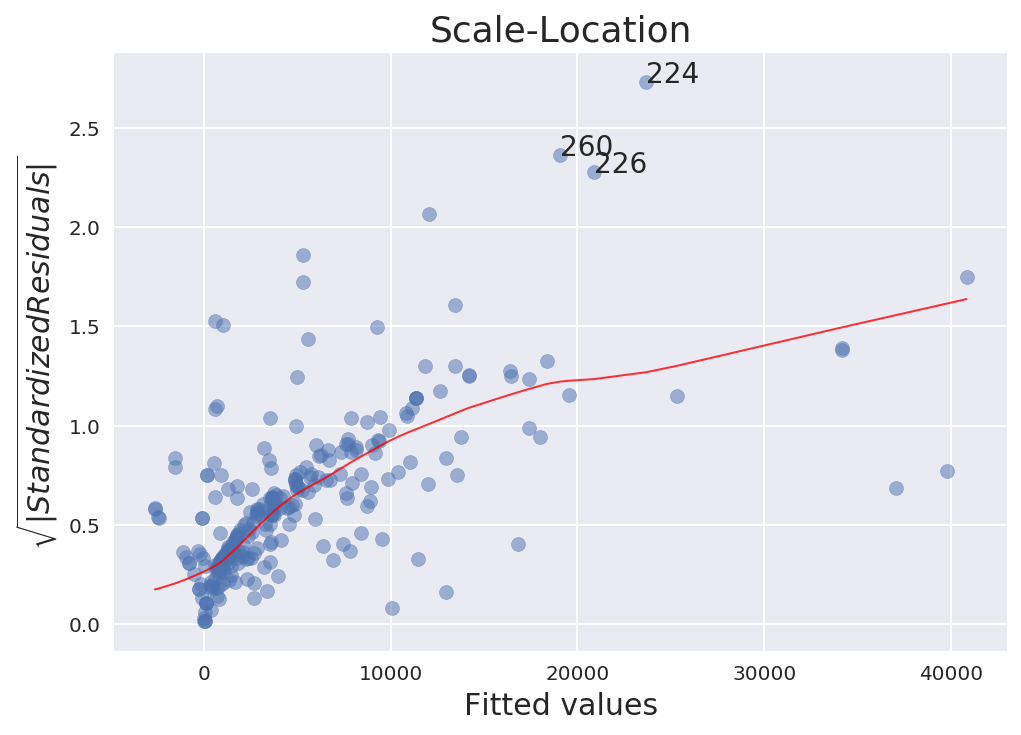

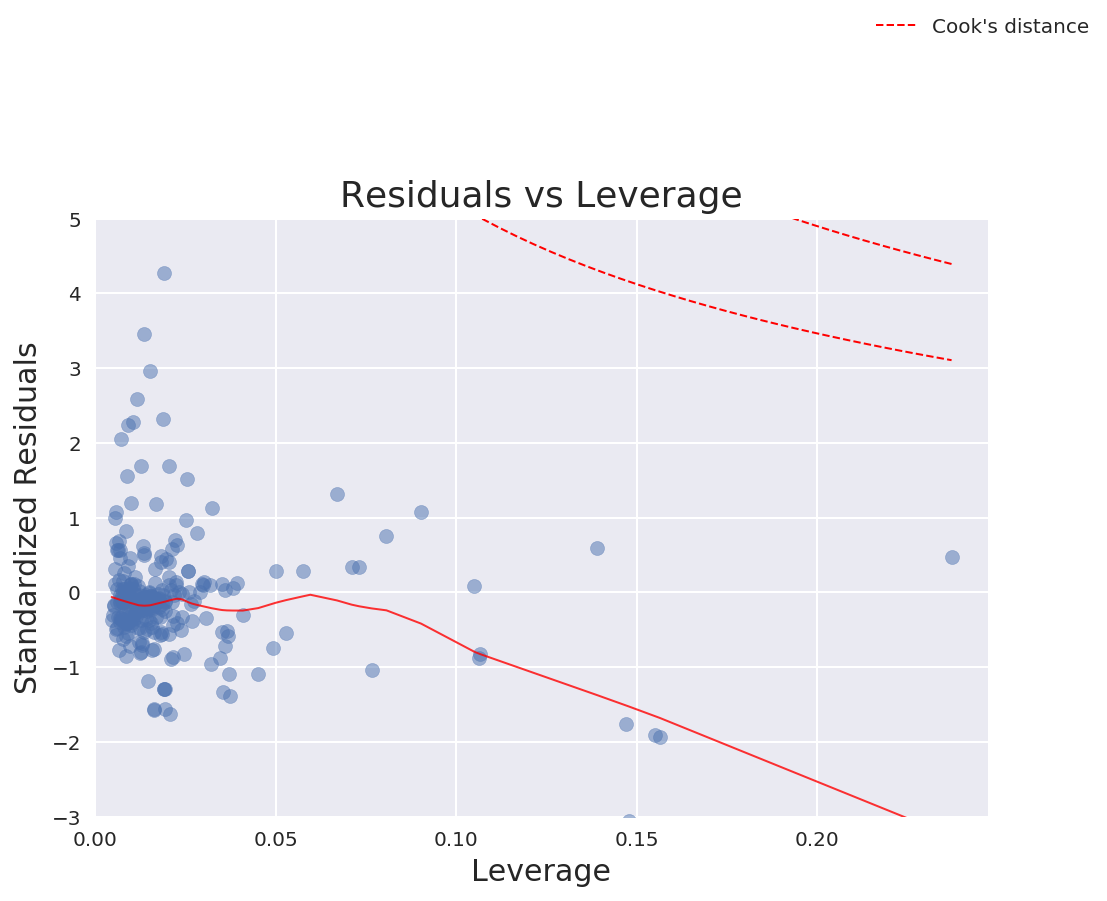

In [5680]:
diagnostic_plots(X, y)

### Plots for Transformed Variables
i.e. in this run, there are transformations on the dependent 'pledged', and transformations on 'photo count', 'negative description sentiment', and 'number of gift options'.

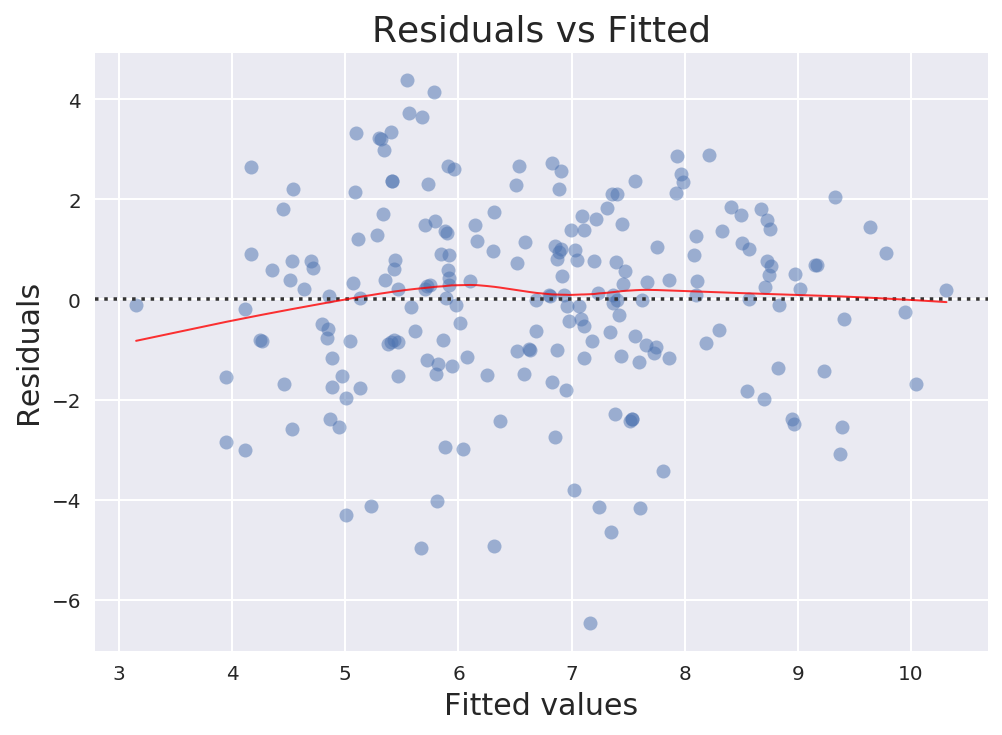

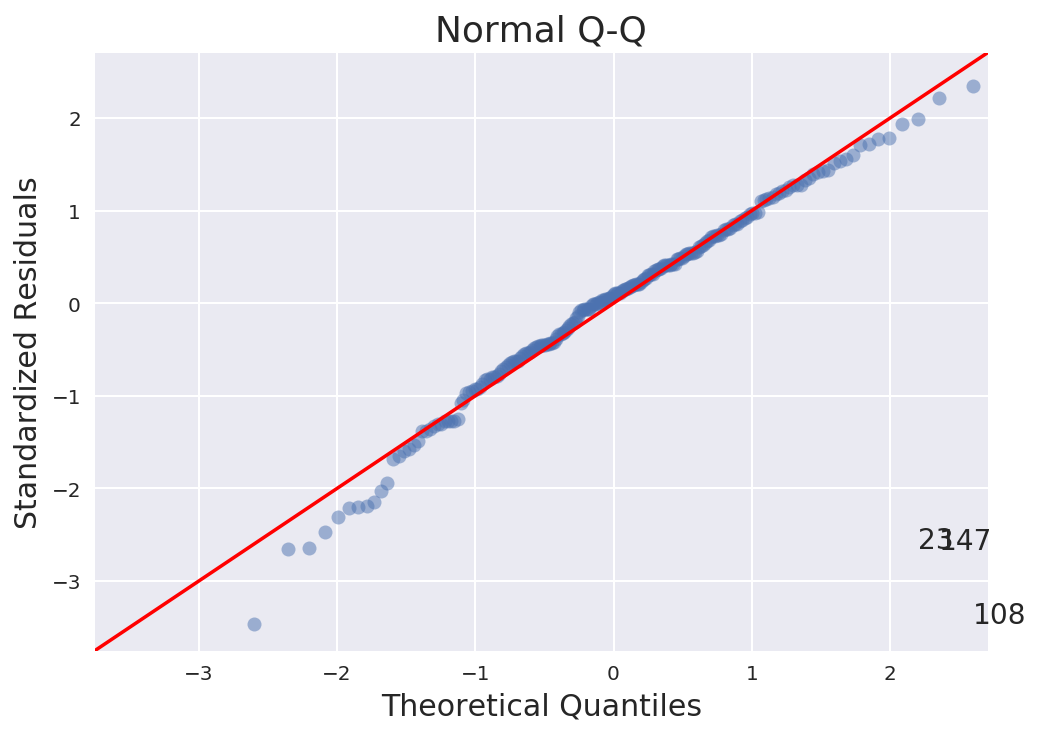

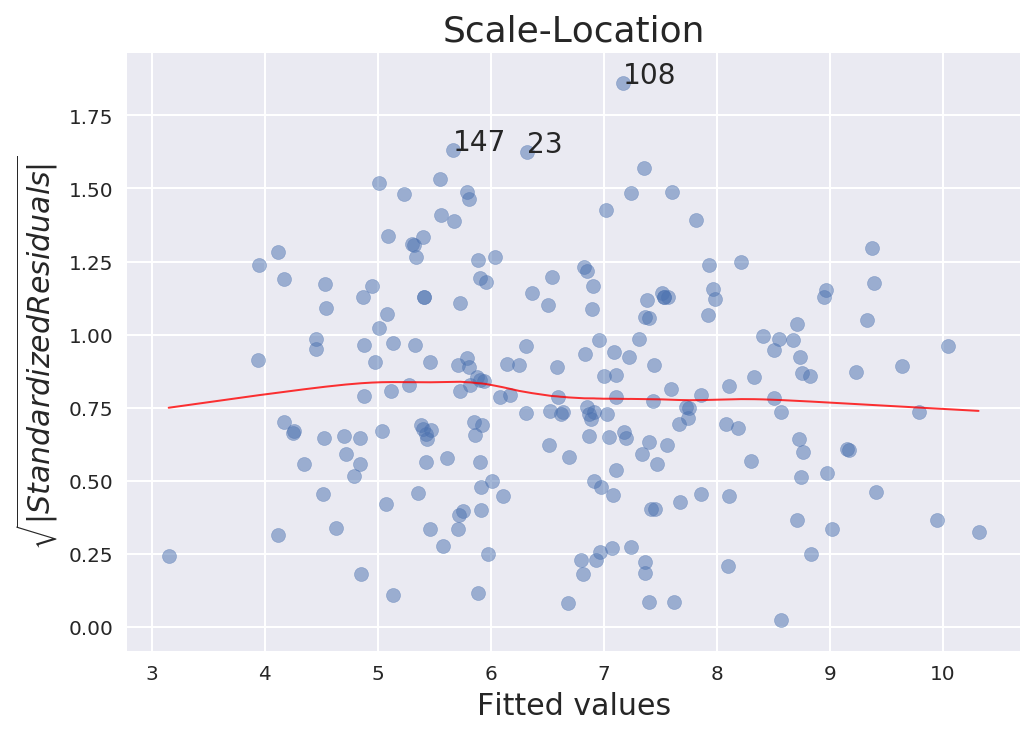

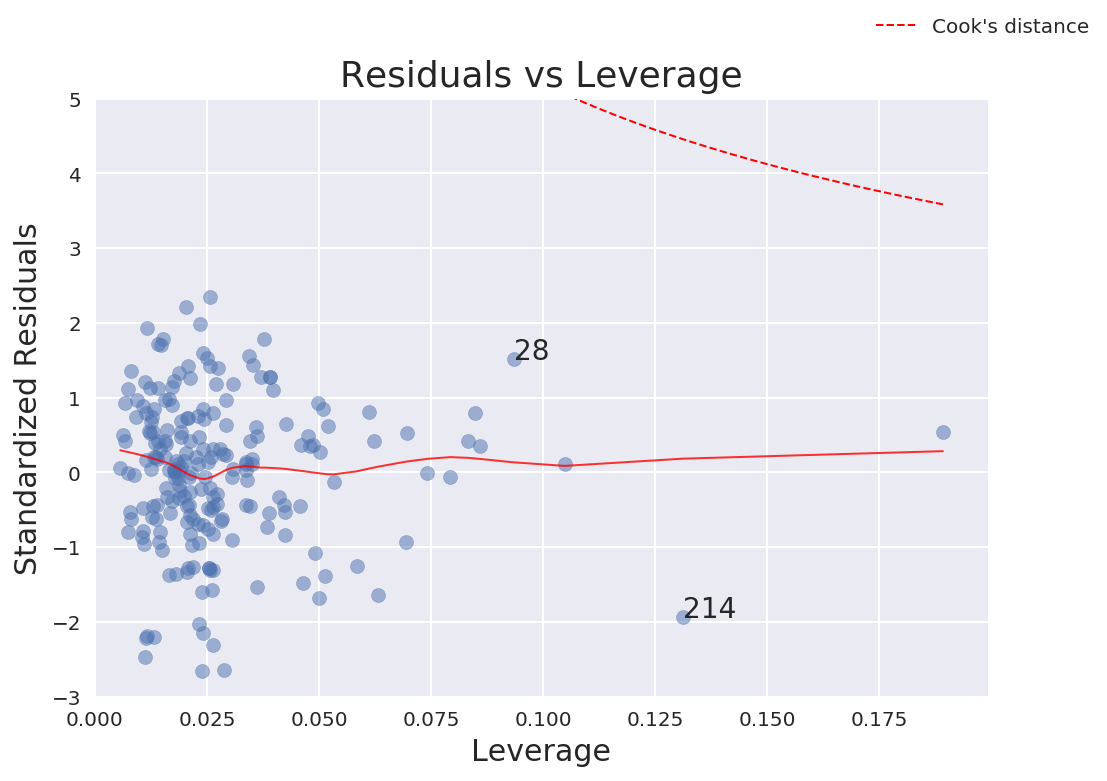

In [6237]:
diagnostic_plots(X,y)

# Multicollinearity Check with VIF
No alarming values of VIF for these choices. All under or near the conservative 'rule of thumb' of VIF=4, and many people even use VIF=10 for a threshold.

In [5737]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6238]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [6239]:
vif.round(1)

,VIF Factor,features
0,2.9,all_text
1,4.3,project_length
2,1.5,photo_cnt_t
3,1.7,all_sentiment_neg
4,4.3,num_gift_options_t
